# Classification of data into time classes
## Load libraries

In [130]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Load data

In [88]:
raw_df = pd.read_csv('DATA_test.csv', index_col=0, low_memory=False)
print(raw_df.shape)
raw_df.head()

(17142, 27)


,.note.ABI-tag,.note.gnu.build-i,.gnu.hash,.dynsym,.dynstr,.rela.dyn,.rela.plt,.init,.plt,.text,...,.got,.got.plt,.data,.bss,.comment,.symtab,.strtab,.shstrtab,filesize,time
.interp,,,,,,,,,,,,,,,,,,,,,
000000000000001c,20,24,000000000000001c,108,000000000000011a,00000000000000f0,60,000000000000001b,50,285,...,30,38,10,8,000000000000001a,00000000000006c0,00000000000002fc,103,49768,0.003860
000000000000001c,20,24,000000000000001c,108,000000000000011a,00000000000000f0,60,000000000000001b,50,285,...,30,38,10,8,000000000000001a,00000000000006c0,00000000000002fc,103,49768,0.003722
000000000000001c,20,24,000000000000001c,108,000000000000011a,00000000000000f0,60,000000000000001b,50,285,...,30,38,10,8,000000000000001a,00000000000006c0,00000000000002fc,103,49768,0.003755
000000000000001c,20,24,000000000000001c,108,000000000000011a,00000000000000f0,60,000000000000001b,50,285,...,30,38,10,8,000000000000001a,00000000000006c0,00000000000002fc,103,49768,0.003699
000000000000001c,20,24,000000000000001c,108,000000000000011a,00000000000000f0,60,000000000000001b,50,285,...,30,38,10,8,000000000000001a,00000000000006c0,00000000000002fc,103,49768,0.003713


# Analyzing independent variable

/home/timetraveller/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


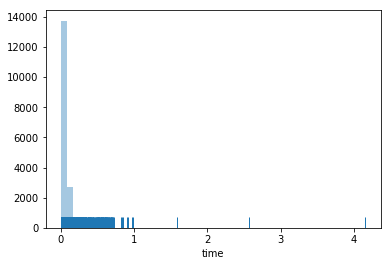

In [89]:
x = raw_df.time.values
sns.distplot(tuple(x), kde=False, rug=True, axlabel="time")

In [4]:
??sns.distplot

In [90]:
print(f"Mean: {np.mean(x)} | Max: {np.max(x)} | Min: {np.min(x)} | Std: {np.std(x)}")

Mean: 0.04466704669403176 | Max: 4.152191638946533 | Min: 0.00357818603515625 | Std: 0.08001043312146451


In [91]:
c1 = raw_df[raw_df.time<0.1]
c2 = raw_df[raw_df.time<0.2]
c3 = raw_df[raw_df.time<0.3]
c4 = raw_df[raw_df.time<0.4]
c5 = raw_df[raw_df.time<0.5]
e1 = c1.shape[0]
e2 = c2.shape[0] - c1.shape[0]
e3 = c3.shape[0] - c2.shape[0]
e4 = c4.shape[0] - c3.shape[0]
e5 = c5.shape[0] - c4.shape[0]
print(e1,e2,e3,e4,e5)

14240 2678 70 46 25


## Preprocessing data

In [92]:
#Check for missing data
raw_df.isna().sum()

.note.ABI-tag        0
.note.gnu.build-i    0
.gnu.hash            0
.dynsym              0
.dynstr              0
.rela.dyn            0
.rela.plt            0
.init                0
.plt                 0
.text                0
.fini                0
.rodata              0
.eh_frame_hdr        0
.eh_frame            0
.init_array          0
.fini_array          0
.dynamic             0
.got                 0
.got.plt             0
.data                0
.bss                 0
.comment             0
.symtab              0
.strtab              0
.shstrtab            0
filesize             0
time                 0
dtype: int64

In [93]:
# removing columns with no unique data
for column in raw_df.columns:
    cardinality = len(pd.unique(raw_df[column]))
    if cardinality == 1:
        raw_df.drop(column, axis=1, inplace=True)
print(raw_df.shape)
raw_df.head()

(17142, 17)


,.gnu.hash,.dynsym,.dynstr,.rela.dyn,.rela.plt,.plt,.text,.rodata,.eh_frame_hdr,.eh_frame,.got,.got.plt,.bss,.symtab,.strtab,filesize,time
.interp,,,,,,,,,,,,,,,,,
000000000000001c,000000000000001c,108,000000000000011a,00000000000000f0,60,50,285,0000000000007d40,44,118,30,38,8,00000000000006c0,00000000000002fc,49768,0.003860
000000000000001c,000000000000001c,108,000000000000011a,00000000000000f0,60,50,285,0000000000007d48,44,118,30,38,8,00000000000006c0,00000000000002fc,49768,0.003722
000000000000001c,000000000000001c,108,000000000000011a,00000000000000f0,60,50,285,0000000000007d50,44,118,30,38,8,00000000000006c0,00000000000002fc,49768,0.003755
000000000000001c,000000000000001c,108,000000000000011a,00000000000000f0,60,50,285,0000000000007d58,44,118,30,38,8,00000000000006c0,00000000000002fc,49768,0.003699
000000000000001c,000000000000001c,108,000000000000011a,00000000000000f0,60,50,285,0000000000007d60,44,118,30,38,8,00000000000006c0,00000000000002fc,49768,0.003713


In [94]:
# Find low cardinality columns
for column in raw_df.columns:
    cardinality = len(pd.unique(raw_df[column]))
    print(f"{column} has {cardinality} unique features")

.gnu.hash has 2 unique features
.dynsym has 6 unique features
.dynstr has 6 unique features
.rela.dyn has 3 unique features
.rela.plt has 6 unique features
.plt has 4 unique features
.text has 39 unique features
.rodata has 10971 unique features
.eh_frame_hdr has 3 unique features
.eh_frame has 3 unique features
.got has 2 unique features
.got.plt has 4 unique features
.bss has 2 unique features
.symtab has 6 unique features
.strtab has 12 unique features
filesize has 560 unique features
time has 11379 unique features


In [95]:
#Make low cardinality columns categorical
for column in raw_df.columns:
    cardinality = len(pd.unique(raw_df[column]))
    if cardinality < 11:
        raw_df[column] = raw_df[column].astype("category", inplace = True)
        raw_df[column] = raw_df[column].cat.codes
raw_df = raw_df.reset_index()        
raw_df.head()        

,.interp,.gnu.hash,.dynsym,.dynstr,.rela.dyn,.rela.plt,.plt,.text,.rodata,.eh_frame_hdr,.eh_frame,.got,.got.plt,.bss,.symtab,.strtab,filesize,time
0,000000000000001c,0,5,2,0,4,1,285,0000000000007d40,1,0,0,1,0,1,00000000000002fc,49768,0.003860
1,000000000000001c,0,5,2,0,4,1,285,0000000000007d48,1,0,0,1,0,1,00000000000002fc,49768,0.003722
2,000000000000001c,0,5,2,0,4,1,285,0000000000007d50,1,0,0,1,0,1,00000000000002fc,49768,0.003755
3,000000000000001c,0,5,2,0,4,1,285,0000000000007d58,1,0,0,1,0,1,00000000000002fc,49768,0.003699
4,000000000000001c,0,5,2,0,4,1,285,0000000000007d60,1,0,0,1,0,1,00000000000002fc,49768,0.003713


In [96]:
#Convert hex to decimal

def hex_to_dec(elem):
    try:
        elem = int(elem, 16)
    except:
        elem = int(elem)
    return elem    
    
for column in raw_df.columns:
    t = raw_df[column].dtype
    if t == 'str' or t=='O':
        print(column)
        raw_df[column] = raw_df[column].map(hex_to_dec) 
        
raw_df.head()        

.interp
.text
.rodata
.strtab


,.interp,.gnu.hash,.dynsym,.dynstr,.rela.dyn,.rela.plt,.plt,.text,.rodata,.eh_frame_hdr,.eh_frame,.got,.got.plt,.bss,.symtab,.strtab,filesize,time
0,28,0,5,2,0,4,1,645,32064,1,0,0,1,0,1,764,49768,0.003860
1,28,0,5,2,0,4,1,645,32072,1,0,0,1,0,1,764,49768,0.003722
2,28,0,5,2,0,4,1,645,32080,1,0,0,1,0,1,764,49768,0.003755
3,28,0,5,2,0,4,1,645,32088,1,0,0,1,0,1,764,49768,0.003699
4,28,0,5,2,0,4,1,645,32096,1,0,0,1,0,1,764,49768,0.003713


# independent data column's categories

In [97]:
max_t = raw_df.time.max()
min_t = raw_df.time.min()
print(f"Max: {max_t} | Min: {min_t}")
df = raw_df.copy()

Max: 4.152191638946533 | Min: 0.00357818603515625


In [98]:
#Let's make 10 classes
class_no = 10
class_no = class_no - 1
# class_width = ( max_t - min_t )/class_no
class_width = ( 0.1 )/class_no
print("Width is: {:.2f} seconds".format(class_width))
def get_class(time):
    for n in np.arange(1,class_no+2):
        if time > (n-1)*class_width and time <= n*class_width:
            return n
df.time = df.time.map(get_class) 
df.tail()

Width is: 0.01 seconds


,.interp,.gnu.hash,.dynsym,.dynstr,.rela.dyn,.rela.plt,.plt,.text,.rodata,.eh_frame_hdr,.eh_frame,.got,.got.plt,.bss,.symtab,.strtab,filesize,time
17137,28,1,1,0,1,0,0,581,5,0,1,0,0,1,2,766,17024,NaN
17138,28,1,1,0,1,0,0,581,5,0,1,0,0,1,2,766,17024,NaN
17139,28,1,1,0,1,0,0,581,5,0,1,0,0,1,2,766,17024,NaN
17140,28,1,1,0,1,0,0,581,5,0,1,0,0,1,2,766,17024,NaN
17141,28,1,1,0,1,0,0,581,5,0,1,0,0,1,2,766,17024,NaN


In [99]:
print("Width is: {:.2f} seconds".format(class_width))
df.time.value_counts()

Width is: 0.01 seconds


1.0     8948
2.0     1309
3.0      843
4.0      675
5.0      591
6.0      532
7.0      484
8.0      446
9.0      412
10.0     388
Name: time, dtype: int64

In [100]:
df.isna().sum()

.interp             0
.gnu.hash           0
.dynsym             0
.dynstr             0
.rela.dyn           0
.rela.plt           0
.plt                0
.text               0
.rodata             0
.eh_frame_hdr       0
.eh_frame           0
.got                0
.got.plt            0
.bss                0
.symtab             0
.strtab             0
filesize            0
time             2514
dtype: int64

In [101]:
df = df.dropna()

In [102]:
df.head()

,.interp,.gnu.hash,.dynsym,.dynstr,.rela.dyn,.rela.plt,.plt,.text,.rodata,.eh_frame_hdr,.eh_frame,.got,.got.plt,.bss,.symtab,.strtab,filesize,time
0,28,0,5,2,0,4,1,645,32064,1,0,0,1,0,1,764,49768,1.0
1,28,0,5,2,0,4,1,645,32072,1,0,0,1,0,1,764,49768,1.0
2,28,0,5,2,0,4,1,645,32080,1,0,0,1,0,1,764,49768,1.0
3,28,0,5,2,0,4,1,645,32088,1,0,0,1,0,1,764,49768,1.0
4,28,0,5,2,0,4,1,645,32096,1,0,0,1,0,1,764,49768,1.0


In [103]:
y = df.time
X = df.drop('time', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [104]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

/home/timetraveller/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [106]:
mean_squared_error(preds, y_test)

0.019688269073010665

In [145]:
confusion_matrix(preds, y_test)

array([[2261,    6,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,  316,    2,    0,    0,    0,    0,    0,    0,    0],
       [   0,    2,  201,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    6,  148,    2,    0,    0,    0,    0,    0],
       [   0,    0,    0,    7,  133,    5,    0,    0,    0,    0],
       [   0,    0,    0,    0,    6,  122,    3,    0,    0,    0],
       [   0,    0,    0,    0,    0,    2,  115,    8,    1,    0],
       [   0,    0,    0,    0,    0,    0,    4,  110,    1,    0],
       [   0,    0,    0,    0,    0,    0,    0,    1,   94,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    7,   88]])

[Text(0,0.5,'f1 score'), Text(0.5,0,'Classes')]

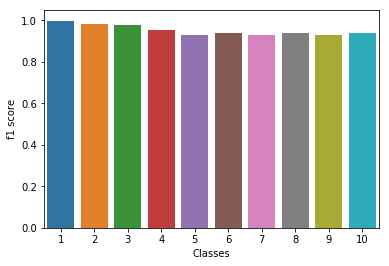

In [144]:
score_f1 = f1_score(preds,y_test, average=None)
classes = [1,2,3,4,5,6,7,8,9,10]
ax = sns.barplot(x=classes,y=score_f1)
ax.set(xlabel='Classes', ylabel='f1 score')

In [135]:
??sns.barplot